In [10]:
import mapd_renderer
import ibis
import altair as alt
from vega_datasets import data

TABLE_NAME = "iris"

In [5]:
host = dict(
    host='qs-dev.mapd.com', port='9091', 
    user='mapd', password='HyperInteractive', 
    database='mapd'
)
mapd = ibis.mapd.connect(**host)

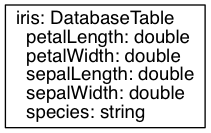

In [11]:
mapd.table(TABLE_NAME)

In [12]:
pandas = ibis.pandas.connect({TABLE_NAME: mapd.table(TABLE_NAME).limit(100).execute()})

# Plotting a subset of the MapD data.

In [16]:
pandas_expr = pandas.table(TABLE_NAME)

In [19]:
alt.renderers.enable('default')

chart = lambda object: alt.Chart(object).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species'
)

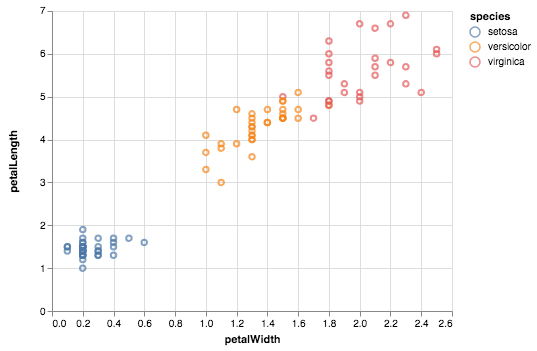

In [20]:
chart(pandas_expr.execute())

In [22]:
mapd_expr = mapd.table(TABLE_NAME)

# Plotting All the MapD data

## Basic Altair Renderer

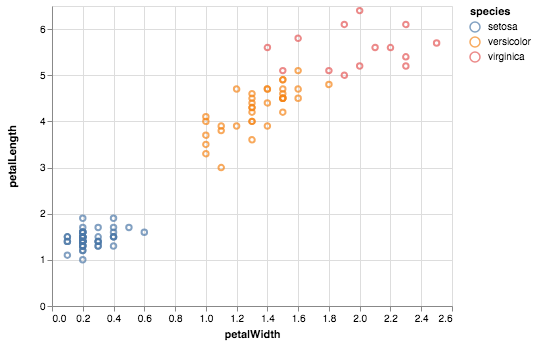

In [23]:
alt.renderers.enable('default')
chart(mapd_expr.limit(100).execute())

## MapD Altair renderer

In [24]:
alt.renderers.enable('mapd', conn=mapd)
chart(mapd_expr.compile())

ValueError: species encoding field is specified without a type; the type cannot be automacially inferred because the data is not specified as a pandas.DataFrame.

Chart({
  data: 'SELECT *\nFROM iris',
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'species'
    }),
    x: X({
      shorthand: 'petalWidth'
    }),
    y: Y({
      shorthand: 'petalLength'
    })
  }),
  mark: 'point'
})